#### Reference for small dataset
https://www.sciencedirect.com/science/article/abs/pii/S0169743998001671

https://stats.stackexchange.com/questions/87881/regression-for-really-small-data-with-high-degree-of-multicollinearity-and-outli

https://medium.com/rants-on-machine-learning/what-to-do-with-small-data-d253254d1a89


https://stats.stackexchange.com/questions/269063/regression-with-small-data-set-and-many-independent-variables

https://stats.stackexchange.com/questions/116132/regression-with-very-small-sample-size

https://stats.stackexchange.com/questions/7180/multiple-regression-with-small-data-sets

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
warnings.filterwarnings('ignore') 

# Set some parameters to get good visuals - style to ggplot and size to 15,10
pd.set_option('display.precision',4)

pd.set_option('display.width',170, 'display.max_rows',200, 'display.max_columns',900)

In [2]:
df = pd.read_csv("mortgage_arrears.csv")

In [3]:
#list(df.columns)

###### Create new features using the difference between yearly and 5 yearly data from census

In [4]:
#Mortgage Count
df['diff_mortgage_count_1'] = df['2012_Mortgate_Count'] - df['2011_Mortgate_Count']
df['diff_mortgage_count_2'] = df['2013_Mortgate_Count'] - df['2012_Mortgate_Count']
df['diff_mortgage_count_3'] = df['2014_Mortgate_Count'] - df['2013_Mortgate_Count']
df['diff_mortgage_count_4'] = df['2015_Mortgate_Count'] - df['2014_Mortgate_Count']
df['diff_mortgage_count_5'] = df['2016_Countof_mortgages'] - df['2015_Mortgate_Count'] # Different column name
df['diff_mortgage_count_6'] = df['2017_Mortgate_Count'] - df['2016_Countof_mortgages']


In [5]:
#New House Prices
df['diff_new_house_price_1'] = df['2012_New_House_Price'] - df['2011_New_House_Price']
df['diff_new_house_price_2'] = df['2013_New_House_Price'] - df['2012_New_House_Price']
df['diff_new_house_price_3'] = df['2014_New_House_Price'] - df['2013_New_House_Price']
df['diff_new_house_price_4'] = df['2015_New_House_Price'] - df['2014_New_House_Price']
df['diff_new_house_price_5'] = df['2016_New_House_Price '] - df['2015_New_House_Price'] # Extra space in the column name
df['diff_new_house_price_6'] = df['2017_New_House_Price'] - df['2016_New_House_Price ']



In [6]:
#Second House Prices
df['diff_secondhand_house_price_1'] = df['2012_Second_Hand_Price'] - df['2011_Second_Hand_Price']
df['diff_secondhand_house_price_2'] = df['2013_Second_Hand_Price'] - df['2012_Second_Hand_Price']
df['diff_secondhand_house_price_3'] = df['2014_Second_Hand_Price'] - df['2013_Second_Hand_Price']
df['diff_secondhand_house_price_4'] = df['2015_Second_Hand_Price'] - df['2014_Second_Hand_Price']
df['diff_secondhand_house_price_5'] = df['2016_Second_Hand_Price'] - df['2015_Second_Hand_Price']
df['diff_secondhand_house_price_6'] = df['2017_Second_Hand_Price'] - df['2016_Second_Hand_Price']

In [7]:
#Sum House Prices
df['diff_sum_house_price_1'] = df['2012_Sum_of_Price'] - df['2011_Sum_of_Price']
df['diff_sum_house_price_2'] = df['2013_Sum_of_Price'] - df['2012_Sum_of_Price']
df['diff_sum_house_price_3'] = df['2014_Sum_of_Price'] - df['2013_Sum_of_Price']
df['diff_sum_house_price_4'] = df['2015_Sum_of_Price'] - df['2014_Sum_of_Price']
df['diff_sum_house_price_5'] = df['2016_Sum_of_Price'] - df['2015_Sum_of_Price']
df['diff_sum_house_price_6'] = df['2017_Sum_of_Price'] - df['2016_Sum_of_Price']

In [8]:
#Average Interest Rate
df['diff_interestrate_1'] = df['2012_AVG_Interest_Rate'] - df['2011_AVG_Interest_Rate']
df['diff_interestrate_2'] = df['2013_AVG_Interest_Rate'] - df['2012_AVG_Interest_Rate']
df['diff_interestrate_3'] = df['2014_AVG_Interest_Rate'] - df['2013_AVG_Interest_Rate']
df['diff_interestrate_4'] = df['2015_AVG_Interest_Rate'] - df['2014_AVG_Interest_Rate']
df['diff_interestrate_5'] = df['2016_AVG_Interest_Rate'] - df['2015_AVG_Interest_Rate']
df['diff_interestrate_6'] = df['2017_AVG_Interest_Rate'] - df['2016_AVG_Interest_Rate']

In [9]:
#Loan Arrears
df['diff_loanarrears_1'] = df['2012_LA_Arrears'] - df['2011_LA_Arrears']
df['diff_loanarrears_2'] = df['2013_LA_Arrears'] - df['2012_LA_Arrears']
df['diff_loanarrears_3'] = df['2014_LA_Arrears'] - df['2013_LA_Arrears']
df['diff_loanarrears_4'] = df['2015_LA_Arrears'] - df['2014_LA_Arrears']
df['diff_loanarrears_5'] = df['2016_LA_Arrears'] - df['2015_LA_Arrears']
df['diff_loanarrears_6'] = df['2017_LA_Arrears'] - df['2016_LA_Arrears']

In [10]:
#Loans Approved
df['diff_loanapproved_1'] = df['2012_Loans Approved'] - df['2011_Loans Approved']
df['diff_loanapproved_2'] = df['2013_Loans Approved'] - df['2012_Loans Approved']
df['diff_loanapproved_3'] = df['2014_Loans Approved'] - df['2013_Loans Approved']
df['diff_loanapproved_4'] = df['2015_Loans Approved'] - df['2014_Loans Approved']
df['diff_loanapproved_5'] = df['2016_Loans_Approved'] - df['2015_Loans Approved']
df['diff_loanapproved_6'] = df['2017_Loans Approved'] - df['2016_Loans_Approved']

In [11]:
#Loans Paid
df['diff_loanpaid_1'] = df['2012_Loans_Paid'] - df['2011_Loans_Paid']
df['diff_loanpaid_2'] = df['2013_Loans_Paid'] - df['2012_Loans_Paid']
df['diff_loanpaid_3'] = df['2014_Loans_Paid'] - df['2013_Loans_Paid']
df['diff_loanpaid_4'] = df['2015_Loans_Paid'] - df['2014_Loans_Paid']
df['diff_loanpaid_5'] = df['2016_Loans_Paid'] - df['2015_Loans_Paid']
df['diff_loanpaid_6'] = df['2017_Loans_Paid'] - df['2016_Loans_Paid']


###### Diversity in county according to Sex. Take a difference between the 5 years

In [12]:

df['2011_diversity_bothsexes'] = df[['2011_African-Both sexes',
'2011_All nationalities-Both sexes',
'2011_American (US)-Both sexes', 
 '2011_Brazilian-Both sexes',
 '2011_French-Both sexes',
 '2011_German-Both sexes',
 '2011_Indian-Both sexes',
 '2011_Irish-Both sexes', 
 '2011_Italian-Both sexes',
 '2011_Latvian-Both sexes',
 '2011_Lithuanian-Both sexes', 
 '2011_Not stated, including no nationality-Both sexes', 
 '2011_Other American-Both sexes', 
 '2011_Other Asian-Both sexes', 
 '2011_Other EU28-Both sexes', 
 '2011_Other European-Both sexes',
 '2011_Other nationalities-Both sexes',
 '2011_Polish-Both sexes', 
 '2011_Romanian-Both sexes', 
 '2011_Spanish-Both sexes', 
 '2011_UK-Both sexes']].sum(axis = 1)

In [13]:

df['2016_diversity_bothsexes'] = df[['2016_African-Both sexes',
'2016_All nationalities-Both sexes',
'2016_American (US)-Both sexes', 
 '2016_Brazilian-Both sexes',
 '2016_French-Both sexes',
 '2016_German-Both sexes',
 '2016_Indian-Both sexes',
 '2016_Irish-Both sexes', 
 '2016_Italian-Both sexes',
 '2016_Latvian-Both sexes',
 '2016_Lithuanian-Both sexes', 
 '2016_Not stated, including no nationality-Both sexes', 
 '2016_Other American-Both sexes', 
 '2016_Other Asian-Both sexes', 
 '2016_Other EU28-Both sexes', 
 '2016_Other European-Both sexes',
 '2016_Other nationalities-Both sexes',
 '2016_Polish-Both sexes', 
 '2016_Romanian-Both sexes', 
 '2016_Spanish-Both sexes', 
 '2016_UK-Both sexes']].sum(axis = 1)

In [14]:
df['diff_diversity_bothsexes'] = df['2016_diversity_bothsexes'] - df['2011_diversity_bothsexes']

In [15]:
#df['diff_diversity_bothsexes']

In [16]:
df['2011_diversity_female'] = df[['2011_African-Female',
'2011_All nationalities-Female',
'2011_American (US)-Female',
'2011_Brazilian-Female',
'2011_French-Female',
'2011_German-Female',
 '2011_Indian-Female',
'2011_Irish-Female',
 '2011_Italian-Female',
 '2011_Latvian-Female',
'2011_Lithuanian-Female',
'2011_Not stated, including no nationality-Female',
'2011_Other American-Female',
 '2011_Other Asian-Female',
'2011_Other EU28-Female',
 '2011_Other European-Female',
'2011_Other nationalities-Female',
'2011_Polish-Female',
'2011_Romanian-Female',
'2011_Spanish-Female',
 '2011_UK-Female']].sum(axis = 1)

In [17]:
df['2016_diversity_female'] = df[['2016_African-Female',
'2016_All nationalities-Female',
'2016_American (US)-Female',
'2016_Brazilian-Female',
'2016_French-Female',
'2016_German-Female',
 '2016_Indian-Female',
'2016_Irish-Female',
 '2016_Italian-Female',
 '2016_Latvian-Female',
'2016_Lithuanian-Female',
'2016_Not stated, including no nationality-Female',
'2016_Other American-Female',
 '2016_Other Asian-Female',
'2016_Other EU28-Female',
 '2016_Other European-Female',
'2016_Other nationalities-Female',
'2016_Polish-Female',
'2016_Romanian-Female',
'2016_Spanish-Female',
 '2016_UK-Female']].sum(axis = 1)

In [18]:
df['diff_diversity_female'] = df['2016_diversity_female'] - df['2011_diversity_female']

In [19]:
df['2011_diversity_male'] = df[[ '2011_African-Male',
'2011_All nationalities-Male',
 '2011_American (US)-Male',
 '2011_Brazilian-Male',
  '2011_French-Male',
 '2011_German-Male',
 '2011_Indian-Male',
'2011_Irish-Male',
 '2011_Italian-Male',
 '2011_Latvian-Male',
 '2011_Lithuanian-Male',
 '2011_Not stated, including no nationality-Male',
'2011_Other American-Male',
'2011_Other Asian-Male',
'2011_Other EU28-Male',
 '2011_Other European-Male',
 '2011_Other nationalities-Male',
'2011_Polish-Male',
'2011_Romanian-Male',
'2011_Spanish-Male',
 '2011_UK-Male']].sum(axis = 1)

In [20]:
df['2016_diversity_male'] = df[[ '2016_African-Male',
'2016_All nationalities-Male',
 '2016_American (US)-Male',
 '2016_Brazilian-Male',
  '2016_French-Male',
 '2016_German-Male',
 '2016_Indian-Male',
'2016_Irish-Male',
 '2016_Italian-Male',
 '2016_Latvian-Male',
 '2016_Lithuanian-Male',
 '2016_Not stated, including no nationality-Male',
'2016_Other American-Male',
'2016_Other Asian-Male',
'2016_Other EU28-Male',
 '2016_Other European-Male',
 '2016_Other nationalities-Male',
'2016_Polish-Male',
'2016_Romanian-Male',
'2016_Spanish-Male',
 '2016_UK-Male']].sum(axis = 1)

In [21]:
df['diff_diversity_male'] = df['2016_diversity_male'] - df['2011_diversity_male']

In [22]:
df['diff_male_population'] = df['2016_Male_Population'] - df['2011_Male_Population']

In [23]:
df['diff_female_population'] = df['2016_Female_Population'] - df['2011_Female_Population']

In [24]:
df['diff_total_population'] = df['2016_Total_Population'] - df['2011_Total_Population']

In [25]:
df['diff_migration_population'] = df['2016_Migration_Population'] - df['2011_Migration_Population']

In [26]:
df['diff_1-14years_population'] = df['2016_1 - 14 years'] -df['2011_1 - 14 years']
df['diff_15-19years_population'] = df['2016_15 - 19 years'] -df['2011_15 - 19 years']
df['diff_20-24years_population'] = df['2016_20 - 24 years'] -df['2011_20 - 24 years']
df['diff_25-29years_population'] = df['2016_25 - 29 years'] -df['2011_25 - 29 years']
df['diff_30-34years_population'] = df['2016_30 - 34 years'] -df['2011_30 - 34 years']
df['diff_35-44years_population'] = df['2016_35 - 44 years'] -df['2011_35 - 44 years']
df['diff_45-54years_population'] = df['2016_45 - 54 years'] -df['2011_45 - 54 years']
df['diff_55-64years_population'] = df['2016_55 - 64 years'] -df['2011_55 - 64 years']
df['diff_65-74years_population'] = df['2016_65 - 74 years'] -df['2011_65 - 74 years']
df['diff_75years_over_population'] = df['2016_75 years and over'] -df['2011_75 years and over']

In [27]:
#Employment
df['diff_employment'] = df['2016_employment'] - df['2011_employment']
df['diff_average'] = df['Average of 2016'] - df['Average of 2011']
df['diff_All persons aged 15 years and over'] = df['2016_All persons aged 15 years and over'] - df['2011_All persons aged 15 years and over']
df['diff_Employer or own account worker'] = df['2016_Employer or own account worker'] - df['2011_Employer or own account worker']
df['diff_Employee'] = df['2016_Employee'] - df['2011_Employee']
df['diff_Assisting_relative'] = df['2016_Assisting_relative'] - df['2011_Assisting_relative']
df['diff_Unemployed looking for first regular job'] = df['2016_Unemployed looking for first regular job'] - df['2011_Unemployed looking for first regular job']
df['diff_Unemployed having lost or given up previous job'] = df['2016_Unemployed having lost or given up previous job'] - df['2011_Unemployed having lost or given up previous job']
df['diff_Student'] = df['2016_Student'] - df['2011_Student']
df['diff_Looking after home/family'] = df['2016_Looking after home/family'] - df['2011_Looking after home/family']
df['diff_Retired'] = df['2016_Retired'] - df['2011_Retired']
df['diff_Unable to work due to permanent sickness or disability'] = df['2016_Unable to work due to permanent sickness or disability'] - df['2011_Unable to work due to permanent sickness or disability']
df['diff_Other economic status'] = df['2016_Other economic status'] - df['2011_Other economic status']

In [28]:
#martital Status
df['diff_Married_First_Marriage'] = df['2016_Married_First_Marriage'] - df['2011_Married_First_Marriage']
df['diff_divorced'] = df['2016_Divorsed'] - df['2011_Divorsed']
df['diff_Same_Sex_Civil Partners'] = df['2016_Same_Sex_Civil Partners'] - df['2011_Same_Sex_Civil Partners']
df['diff_Remarried'] = df['2016_Remarried'] - df['2011_Remarried']
df['diff_Seperated'] = df['2016_Seperated'] - df['2011_Seperated']
df['diff_Single'] = df['2016_Single'] - df['2011_Single']
df['diff_Widowed'] = df['2016_Widowed'] - df['2011_Widowed']
df['diff_Remarried'] = df['2016_Remarried'] - df['2011_Remarried']



In [29]:
#Commmuter Information
df['diff_all_depature_timeAll_Persons'] = df['2016_all_depature_timeAll_Persons'] - df['2011_all_depature_timeAll_Persons']
df['diff_all_depature_time_Children at school aged between 5 and 12 years'] = df['2016_all_depature_time_Children at school aged between 5 and 12 years'] - df['2011_all_depature_time_Children at school aged between 5 and 12 years']
df['diff_all_depature_time_Students at school or college aged between 13 and 18 years'] = df['2016_all_depature_time_Students at school or college aged between 13 and 18 years'] - df['2011_all_depature_time_Students at school or college aged between 13 and 18 years']
df['diff_all_depature_time_Students at school or college aged 19 years and over'] = df['2016_all_depature_time_Students at school or college aged 19 years and over'] - df['2011_all_depature_time_Students at school or college aged 19 years and over']
df['diff_all_depature_time_Population aged 15 years and over at work'] = df['2016_all_depature_time_Population aged 15 years and over at work'] - df['2011_all_depature_time_Population aged 15 years and over at work']

In [30]:
#Type of house
df['diff_AllPrivate'] = df['2016_AllPrivate'] - df['2011_AllPrivate']


In [31]:
df.shape

(27, 381)

In [32]:
train = df[['County','diff_mortgage_count_1',
 'diff_mortgage_count_2',
 'diff_mortgage_count_3',
 'diff_mortgage_count_4',
 'diff_mortgage_count_5',
 'diff_mortgage_count_6',
 'diff_new_house_price_1',
 'diff_new_house_price_2',
 'diff_new_house_price_3',
 'diff_new_house_price_4',
 'diff_new_house_price_5',
 'diff_new_house_price_6',
 'diff_secondhand_house_price_1',
 'diff_secondhand_house_price_2',
 'diff_secondhand_house_price_3',
 'diff_secondhand_house_price_4',
 'diff_secondhand_house_price_5',
 'diff_secondhand_house_price_6',
 'diff_sum_house_price_1',
 'diff_sum_house_price_2',
 'diff_sum_house_price_3',
 'diff_sum_house_price_4',
 'diff_sum_house_price_5',
 'diff_sum_house_price_6',
 'diff_interestrate_1',
 'diff_interestrate_2',
 'diff_interestrate_3',
 'diff_interestrate_4',
 'diff_interestrate_5',
 'diff_interestrate_6',
 'diff_loanarrears_1',
 'diff_loanarrears_2',
 'diff_loanarrears_3',
 'diff_loanarrears_4',
 'diff_loanarrears_5',
 'diff_loanarrears_6',
 'diff_loanapproved_1',
 'diff_loanapproved_2',
 'diff_loanapproved_3',
 'diff_loanapproved_4',
 'diff_loanapproved_5',
 'diff_loanapproved_6',
 'diff_loanpaid_1',
 'diff_loanpaid_2',
 'diff_loanpaid_3',
 'diff_loanpaid_4',
 'diff_loanpaid_5',
 'diff_loanpaid_6',
   'diff_diversity_bothsexes',
   'diff_diversity_female','diff_diversity_male',
 'diff_male_population',
 'diff_female_population',
 'diff_total_population',
 'diff_migration_population',
 'diff_1-14years_population',
 'diff_15-19years_population',
 'diff_20-24years_population',
 'diff_25-29years_population',
 'diff_30-34years_population',
 'diff_35-44years_population',
 'diff_45-54years_population',
 'diff_55-64years_population',
 'diff_65-74years_population',
 'diff_75years_over_population',
 'diff_employment',
 'diff_average',
 'diff_Married_First_Marriage',
 'diff_divorced',
 'diff_Same_Sex_Civil Partners',
 'diff_Remarried',
 'diff_Seperated',
 'diff_Single',
 'diff_Widowed',
   'diff_AllPrivate',
 'diff_All persons aged 15 years and over',
 'diff_Employer or own account worker',
 'diff_Employee',
 'diff_Assisting_relative',
 'diff_Unemployed looking for first regular job',
 'diff_Unemployed having lost or given up previous job',
 'diff_Student',
 'diff_Looking after home/family',
 'diff_Retired',
 'diff_Unable to work due to permanent sickness or disability',
 'diff_Other economic status',
 'diff_all_depature_timeAll_Persons',
 'diff_all_depature_time_Children at school aged between 5 and 12 years',
 'diff_all_depature_time_Students at school or college aged between 13 and 18 years',
 'diff_all_depature_time_Students at school or college aged 19 years and over',
 'diff_all_depature_time_Population aged 15 years and over at work',
   #Loans Approved

 '2011_Loans Approved',
 '2012_Loans Approved',
 '2013_Loans Approved',
 '2014_Loans Approved',
 '2015_Loans Approved', 
'2016_Loans_Approved',
 '2017_Loans Approved',

#Loans Paid
'2011_Loans_Paid',
'2012_Loans_Paid',
'2013_Loans_Paid',
 '2014_Loans_Paid',
'2015_Loans_Paid',
 '2017_Loans_Paid', 
 '2016_Loans_Paid',

# Repossesions of the houses

'2011_Forced',
 '2011_Voluntary',
 '2012_Forced',
 '2012_Voluntary',
 '2013_Forced',
 '2013_Voluntary',
 '2014_Forced',
 '2014_Voluntary',
 '2015_Forced',
 '2015_Voluntary',
 '2016_Forced',
 '2017_Voluntary',
 '2017_Forced',
 '2017_Voluntary.1',

#Number of Employees
 '2012_Employees',
 '2013_Employees',
 '2014_Employees',
 '2015_Employees',
 '2016_Employees',

#Arrears— 2017_LA_Arrears is the target variable
'2011_LA_Arrears',
'2012_LA_Arrears',
 '2013_LA_Arrears',
'2014_LA_Arrears',
'2015_LA_Arrears',
 '2016_LA_Arrears',
'2017_LA_Arrears']]

In [33]:
train = df[['County','diff_mortgage_count_1',
 'diff_mortgage_count_2',
 'diff_mortgage_count_3',
 'diff_mortgage_count_4',
 'diff_mortgage_count_5',
 'diff_mortgage_count_6',
 'diff_new_house_price_1',
 'diff_new_house_price_2',
 'diff_new_house_price_3',
 'diff_new_house_price_4',
 'diff_new_house_price_5',
 'diff_new_house_price_6',
 'diff_secondhand_house_price_1',
 'diff_secondhand_house_price_2',
 'diff_secondhand_house_price_3',
 'diff_secondhand_house_price_4',
 'diff_secondhand_house_price_5',
 'diff_secondhand_house_price_6',
 'diff_sum_house_price_1',
 'diff_sum_house_price_2',
 'diff_sum_house_price_3',
 'diff_sum_house_price_4',
 'diff_sum_house_price_5',
 'diff_sum_house_price_6',
 'diff_interestrate_1',
 'diff_interestrate_2',
 'diff_interestrate_3',
 'diff_interestrate_4',
 'diff_interestrate_5',
 'diff_interestrate_6',
 'diff_loanarrears_1',
 'diff_loanarrears_2',
 'diff_loanarrears_3',
 'diff_loanarrears_4',
 'diff_loanarrears_5',
 'diff_loanarrears_6',
 'diff_loanapproved_1',
 'diff_loanapproved_2',
 'diff_loanapproved_3',
 'diff_loanapproved_4',
 'diff_loanapproved_5',
 'diff_loanapproved_6',
 'diff_loanpaid_1',
 'diff_loanpaid_2',
 'diff_loanpaid_3',
 'diff_loanpaid_4',
 'diff_loanpaid_5',
 'diff_loanpaid_6',
#    'diff_diversity_bothsexes',
#    'diff_diversity_female','diff_diversity_male',
#  'diff_male_population',
#  'diff_female_population',
#  'diff_total_population',
#  'diff_migration_population',
#  'diff_1-14years_population',
#  'diff_15-19years_population',
#  'diff_20-24years_population',
#  'diff_25-29years_population',
#  'diff_30-34years_population',
#  'diff_35-44years_population',
#  'diff_45-54years_population',
#  'diff_55-64years_population',
#  'diff_65-74years_population',
#  'diff_75years_over_population',
#  'diff_employment',
#  'diff_average',
#  'diff_Married_First_Marriage',
#  'diff_divorced',
#  'diff_Same_Sex_Civil Partners',
#  'diff_Remarried',
#  'diff_Seperated',
#  'diff_Single',
#  'diff_Widowed',
#    'diff_AllPrivate',
#  'diff_All persons aged 15 years and over',
#  'diff_Employer or own account worker',
#  'diff_Employee',
#  'diff_Assisting_relative',
#  'diff_Unemployed looking for first regular job',
#  'diff_Unemployed having lost or given up previous job',
#  'diff_Student',
#  'diff_Looking after home/family',
#  'diff_Retired',
#  'diff_Unable to work due to permanent sickness or disability',
#  'diff_Other economic status',
#  'diff_all_depature_timeAll_Persons',
#  'diff_all_depature_time_Children at school aged between 5 and 12 years',
#  'diff_all_depature_time_Students at school or college aged between 13 and 18 years',
#  'diff_all_depature_time_Students at school or college aged 19 years and over',
#  'diff_all_depature_time_Population aged 15 years and over at work',
   #Loans Approved

 '2011_Loans Approved',
 '2012_Loans Approved',
 '2013_Loans Approved',
 '2014_Loans Approved',
 '2015_Loans Approved', 
'2016_Loans_Approved',
 #'2017_Loans Approved',

#Loans Paid
'2011_Loans_Paid',
'2012_Loans_Paid',
'2013_Loans_Paid',
 '2014_Loans_Paid',
'2015_Loans_Paid',
 #'2017_Loans_Paid', 
 '2016_Loans_Paid',

# Repossesions of the houses

'2011_Forced',
 '2011_Voluntary',
 '2012_Forced',
 '2012_Voluntary',
 '2013_Forced',
 '2013_Voluntary',
 '2014_Forced',
 '2014_Voluntary',
 '2015_Forced',
 '2015_Voluntary',
 '2016_Forced',
#  '2017_Voluntary',
#  '2017_Forced',
#  '2017_Voluntary.1',

# #Number of Employees
#  '2012_Employees',
#  '2013_Employees',
#  '2014_Employees',
#  '2015_Employees',
#  '2016_Employees',

#Arrears— 2017_LA_Arrears is the target variable
# '2011_LA_Arrears',
# '2012_LA_Arrears',
#  '2013_LA_Arrears',
# '2014_LA_Arrears',
# '2015_LA_Arrears',
#  '2016_LA_Arrears',
'2017_LA_Arrears']]

In [34]:
train['total_diff_mortgage_count'] = train[['diff_mortgage_count_1',
 'diff_mortgage_count_2',
 'diff_mortgage_count_3',
 'diff_mortgage_count_4',
 'diff_mortgage_count_5',
 'diff_mortgage_count_6']].sum(axis=1)

In [35]:
train['total_diff_new_house_price'] =train[['diff_new_house_price_1',
 'diff_new_house_price_2',
 'diff_new_house_price_3',
 'diff_new_house_price_4',
 'diff_new_house_price_5',
 'diff_new_house_price_6']].sum(axis=1)

In [36]:
train['total_diff_secondhand_house'] = train[['diff_secondhand_house_price_1',
 'diff_secondhand_house_price_2',
 'diff_secondhand_house_price_3',
 'diff_secondhand_house_price_4',
 'diff_secondhand_house_price_5',
 'diff_secondhand_house_price_6']].sum(axis=1)

In [37]:
train['total_diff_interestrate'] =train[['diff_interestrate_1',
 'diff_interestrate_2',
 'diff_interestrate_3',
 'diff_interestrate_4',
 'diff_interestrate_5',
 'diff_interestrate_6']].sum(axis=1)

In [38]:
train['total__diff_loanarrears'] = train[['diff_loanarrears_1',
 'diff_loanarrears_2',
 'diff_loanarrears_3',
 'diff_loanarrears_4',
 'diff_loanarrears_5',
 'diff_loanarrears_6']].sum(axis=1)

In [39]:
train['total_diff_loanapproved'] = train[['diff_loanapproved_1',
 'diff_loanapproved_2',
 'diff_loanapproved_3',
 'diff_loanapproved_4',
 'diff_loanapproved_5',
 'diff_loanapproved_6']].sum(axis=1)

In [40]:
train['total_diff_loanpaid'] = train[['diff_loanpaid_1',
 'diff_loanpaid_2',
 'diff_loanpaid_3',
 'diff_loanpaid_4',
 'diff_loanpaid_5',
 'diff_loanpaid_6']].sum(axis=1)

In [41]:
train['sum_forced_possesion'] = df['2011_Forced'] + df['2012_Forced'] + df['2014_Forced'] + df['2015_Forced'] + df['2016_Forced']

In [42]:
train['sum_voluntary_possesion'] = df['2011_Voluntary'] + df['2012_Voluntary'] + df['2014_Voluntary'] + df['2015_Voluntary']

In [43]:
train['sum_societal'] = df[['diff_employment',
 'diff_Married_First_Marriage',
 'diff_divorced',
 'diff_Same_Sex_Civil Partners',
 'diff_Remarried',
 'diff_Seperated',
 'diff_Single',
 'diff_Widowed']].sum(axis =1)

In [44]:
train['sum_population'] = df[['diff_male_population',
 'diff_female_population',
 'diff_total_population',
 'diff_migration_population']].sum(axis =1)

In [45]:
train['sum_commuter'] = df[['diff_all_depature_timeAll_Persons',
 'diff_all_depature_time_Children at school aged between 5 and 12 years',
 'diff_all_depature_time_Students at school or college aged between 13 and 18 years',
 'diff_all_depature_time_Students at school or college aged 19 years and over',
 'diff_all_depature_time_Population aged 15 years and over at work']].sum(axis =1)

In [46]:
#list(train.columns)

In [47]:
train = train[['sum_forced_possesion',
 'sum_voluntary_possesion',
'total_diff_mortgage_count',
# 'total_diff_new_house_price',
# 'total_diff_secondhand_house',
# 'total_diff_interestrate',
 'total__diff_loanarrears',
               'sum_commuter',
               'sum_population',
               'sum_societal',
# 'total_diff_loanapproved',
 #'total_diff_loanpaid',
'2017_LA_Arrears']]

In [48]:
#Remove county and the target label
#X = features.drop('delinquent', axis=1)
X = train[train.columns.difference(['2017_LA_Arrears'])]
y = train['2017_LA_Arrears']

##### Normalizing the table
    

In [49]:
#Standard Scalar
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
X = ss.fit_transform(X)

Leave One Out Cross Validation
R^2: 94.64082%, MSE: 81678771896477.18750
Linear Regression picked 7 features and eliminated the other 0 features


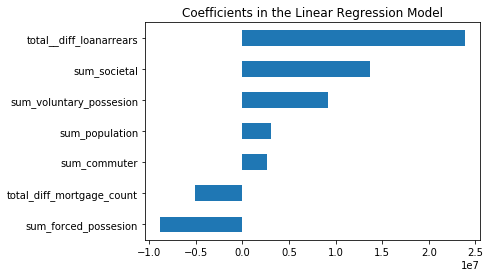

In [50]:
#https://codeburst.io/cross-validation-calculating-r²-and-accuracy-scores-after-loocv-5bd1015a50ec
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn import metrics
y_array = y.values
loo = LeaveOneOut()
ytests = []
ypreds = []
prediction___ =[]
for train_idx, test_idx in loo.split(X):
    X_train, X_test = X[train_idx], X[test_idx] #requires arrays
    y_train, y_test = y_array[train_idx], y_array[test_idx]
    
    model = LinearRegression()
    model.fit(X = X_train, y = y_train) 
    y_pred = model.predict(X_test)
        
    # there is only one y-test and y-pred per iteration over the loo.split, 
    # so to get a proper graph, we append them to respective lists.
        
    ytests += list(y_test)
    ypreds += list(y_pred)
    #print(ypreds)   
    prediction___.append(ypreds[-1:])    
rr = metrics.r2_score(ytests, ypreds)
ms_error = metrics.mean_squared_error(ytests, ypreds)
        
print("Leave One Out Cross Validation")
print("R^2: {:.5f}%, MSE: {:.5f}".format(rr*100, ms_error))
# Plot important coefficients
coefs = pd.Series(model.coef_,  index = train.drop(['2017_LA_Arrears'], axis=1).columns)
print("Linear Regression picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(4),
                     coefs.sort_values().tail(3)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Linear Regression Model")
plt.show()

Leave One Out Cross Validation
R^2: 97.01062%, MSE: 45560799329260.05469
Linear Regression picked 4 features and eliminated the other 0 features


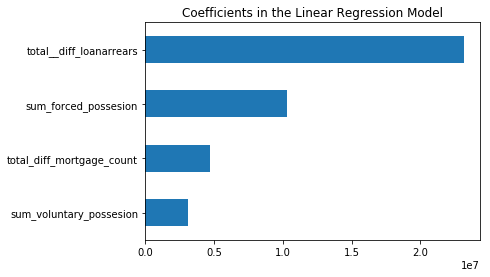

In [51]:
train = train[['sum_forced_possesion',
 'sum_voluntary_possesion',
'total_diff_mortgage_count',
# 'total_diff_new_house_price',
# 'total_diff_secondhand_house',
# 'total_diff_interestrate',
 'total__diff_loanarrears',
               #'sum_commuter',
               #'sum_population',
               #'sum_societal',
# 'total_diff_loanapproved',
 #'total_diff_loanpaid',
'2017_LA_Arrears']]

#Remove county and the target label
#X = features.drop('delinquent', axis=1)
X = train[train.columns.difference(['2017_LA_Arrears'])]
y = train['2017_LA_Arrears']

#Standard Scalar
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
X = ss.fit_transform(X)
#https://codeburst.io/cross-validation-calculating-r²-and-accuracy-scores-after-loocv-5bd1015a50ec
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn import metrics
y_array = y.values
loo = LeaveOneOut()
ytests = []
ypreds = []
prediction___ =[]
for train_idx, test_idx in loo.split(X):
    X_train, X_test = X[train_idx], X[test_idx] #requires arrays
    y_train, y_test = y_array[train_idx], y_array[test_idx]
    
    model = LinearRegression()
    model.fit(X = X_train, y = y_train) 
    y_pred = model.predict(X_test)
        
    # there is only one y-test and y-pred per iteration over the loo.split, 
    # so to get a proper graph, we append them to respective lists.
        
    ytests += list(y_test)
    ypreds += list(y_pred)
    #print(ypreds)   
    prediction___.append(ypreds[-1:])    
rr = metrics.r2_score(ytests, ypreds)
ms_error = metrics.mean_squared_error(ytests, ypreds)
        
print("Leave One Out Cross Validation")
print("R^2: {:.5f}%, MSE: {:.5f}".format(rr*100, ms_error))
# Plot important coefficients
coefs = pd.Series(model.coef_,  index = train.drop(['2017_LA_Arrears'], axis=1).columns)
print("Linear Regression picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(2),
                     coefs.sort_values().tail(2)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Linear Regression Model")
plt.show()

###### In general, the higher the R-squared, the better the model fits your data. However, there are important conditions for this guideline that I’ll talk about both in this post and my next post.

In [52]:
#flatten the list of predictions
flat_predcition_list = [item for sublist in prediction___ for item in sublist]

In [53]:
list(y)


[1905790.0,
 1122724.0,
 1930849.0,
 14753589.0,
 5044587.0,
 81961382.0,
 6048398.0,
 1654449.0,
 11058095.0,
 3286753.0,
 16052841.0,
 309165.0,
 2493977.0,
 2883708.0,
 3345606.0,
 6102632.0,
 4194719.0,
 1910202.0,
 1163066.0,
 359107.0,
 2760242.0,
 2562784.0,
 16058109.0,
 3094415.0,
 1626196.0,
 4218954.0,
 197902338.19999999]

In [54]:
plot_df = pd.DataFrame([y_array, flat_predcition_list], columns = df['County'],index = ["2017_values","Predictions"]).T

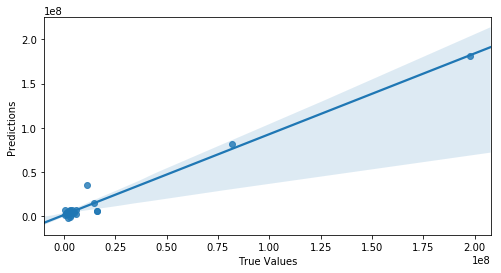

In [55]:
#Plot true values of 2017 and also the predictions
plt.figure(figsize=(8,4))
sns.regplot( x = '2017_values', y = 'Predictions', data = plot_df, scatter=True, order=1)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [56]:
pd.DataFrame([y_array, flat_predcition_list], columns = df['County'],index = ["2017_values","Predictions"]).T.to_csv('predcitions_arrears_small.csv')

In [57]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer

In [58]:
# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (18, 4)
X_test : (9, 4)
y_train : (18,)
y_test : (9,)


Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit. As the square root of a variance, RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. Lower values of RMSE indicate better fit.

http://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/

In [59]:
# Define : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)
loocv = LeaveOneOut()
def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = loocv))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = loocv))
    return(rmse)

RMSE on Training set : 4073478.69823
RMSE on Test set : 8792666.28743


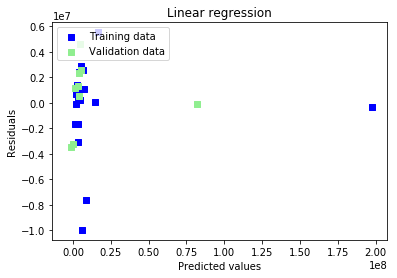

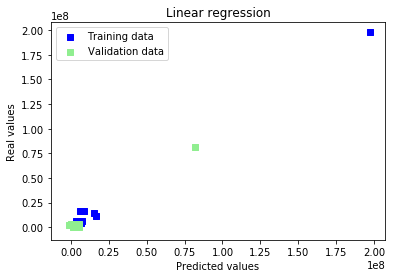

In [60]:
# Linear Regression without regularisation
lr = LinearRegression()
lr.fit(X, y)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = .5, xmax = 1, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([.5, .9], [.5, .9], c = "red")
plt.show()

Errors seem randomly distributed and randomly scattered around the centerline, so there is that at least. It means our model was able to capture most of the explanatory information.



Best alpha : 0.01
Try again for more precision with alphas centered around 0.01
Best alpha : 0.006
Ridge RMSE on Training set : 4245486.08177
Ridge RMSE on Test set : 9964562.46679


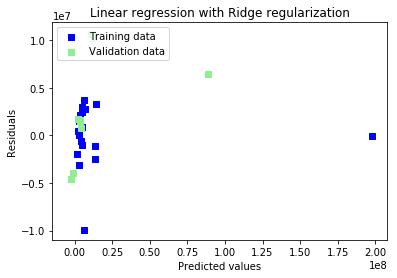

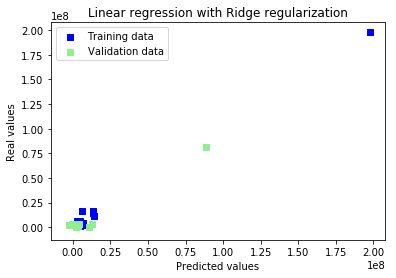

Ridge picked 4 features and eliminated the other 0 features


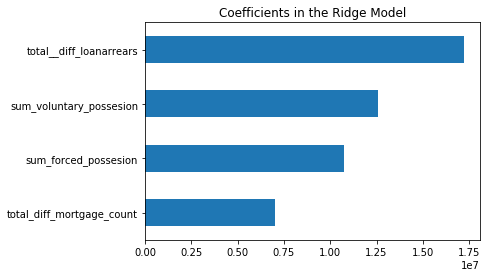

In [61]:
# 2* Ridge
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X, y)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = loocv)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = train.drop(['2017_LA_Arrears'], axis=1).columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(2),
                     coefs.sort_values().tail(2)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

Best alpha : 0.0001
Try again for more precision with alphas centered around 0.0001
Best alpha : 6e-05
Lasso RMSE on Training set : 4073478.70512
Lasso RMSE on Test set : 8792666.3295


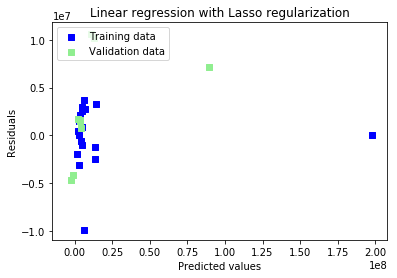

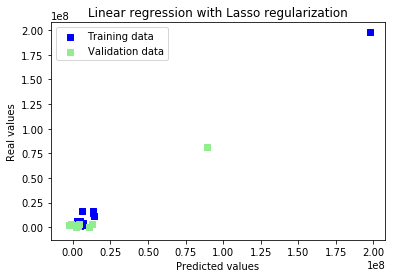

Lasso picked 4 features and eliminated the other 0 features


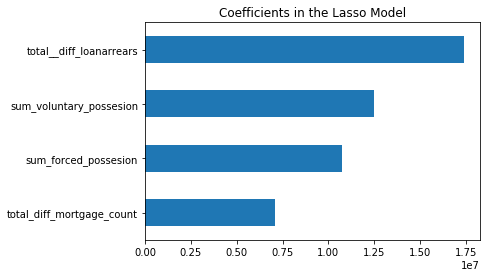

In [62]:
# 3* Lasso
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = loocv)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_las, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(lasso.coef_,  index = train.drop(['2017_LA_Arrears'], axis=1).columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(2),
                     coefs.sort_values().tail(2)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

https://medium.freecodecamp.org/data-science-with-python-8-ways-to-do-linear-regression-and-measure-their-speed-b5577d75f8b

In [63]:
from sklearn.linear_model import Ridge
y_array = y.values
loo = LeaveOneOut()
ytests = []
ypreds = []
prediction___ =[]
for train_idx, test_idx in loo.split(X):
    X_train, X_test = X[train_idx], X[test_idx] #requires arrays
    y_train, y_test = y_array[train_idx], y_array[test_idx]
    
    model = Ridge(alpha = 0.006)
    model.fit(X = X_train, y = y_train) 
    y_pred = model.predict(X_test)
        
    # there is only one y-test and y-pred per iteration over the loo.split, 
    # so to get a proper graph, we append them to respective lists.
        
    ytests += list(y_test)
    ypreds += list(y_pred)
    #print(ypreds)   
    prediction___.append(ypreds[-1:])    
rr = metrics.r2_score(ytests, ypreds)
ms_error = metrics.mean_squared_error(ytests, ypreds)
        
print("Leave One Out Cross Validation")
print("R^2: {:.5f}%, MSE: {:.5f}".format(rr*100, ms_error))


Leave One Out Cross Validation
R^2: 96.98098%, MSE: 46012568736171.34375


In [64]:
from sklearn.linear_model import Lasso
y_array = y.values
loo = LeaveOneOut()
ytests = []
ypreds = []
prediction___ =[]
for train_idx, test_idx in loo.split(X):
    X_train, X_test = X[train_idx], X[test_idx] #requires arrays
    y_train, y_test = y_array[train_idx], y_array[test_idx]
    
    model = Lasso(alpha = 0.0001)
    model.fit(X = X_train, y = y_train) 
    y_pred = model.predict(X_test)
        
    # there is only one y-test and y-pred per iteration over the loo.split, 
    # so to get a proper graph, we append them to respective lists.
        
    ytests += list(y_test)
    ypreds += list(y_pred)
    #print(ypreds)   
    prediction___.append(ypreds[-1:])    
rr = metrics.r2_score(ytests, ypreds)
ms_error = metrics.mean_squared_error(ytests, ypreds)
        
print("Leave One Out Cross Validation")
print("R^2: {:.5f}%, MSE: {:.5f}".format(rr*100, ms_error))


Leave One Out Cross Validation
R^2: 97.01062%, MSE: 45560802792813.46094


##### Reference

https://www.statsmodels.org/dev/graphics.html

https://www.statsmodels.org/devel/example_formulas.html


#### Stats Model

In [65]:
import statsmodels.api as sm
import seaborn
import statsmodels.formula.api as smf 

In [66]:
train.columns = ['sumForcedPossesion','sumVoluntaryPossesion','totalDifferenceMortgageCount','totalDifferenceLoanArrears','mortgageArrears']

In [67]:
train.columns

Index(['sumForcedPossesion', 'sumVoluntaryPossesion', 'totalDifferenceMortgageCount', 'totalDifferenceLoanArrears', 'mortgageArrears'], dtype='object')

In [68]:
# linear regression analysis
reg1 = smf.ols('mortgageArrears ~ sumForcedPossesion', data=train).fit()
print (reg1.summary())

                            OLS Regression Results                            
Dep. Variable:        mortgageArrears   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     672.5
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           1.37e-19
Time:                        20:17:24   Log-Likelihood:                -465.34
No. Observations:                  27   AIC:                             934.7
Df Residuals:                      25   BIC:                             937.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.882e+05   1.58

In [69]:
# linear regression analysis
reg1 = smf.ols('mortgageArrears ~ sumVoluntaryPossesion', data=train).fit()
print (reg1.summary())

                            OLS Regression Results                            
Dep. Variable:        mortgageArrears   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     164.5
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           1.70e-12
Time:                        20:17:24   Log-Likelihood:                -482.93
No. Observations:                  27   AIC:                             969.9
Df Residuals:                      25   BIC:                             972.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2.299e+

In [70]:
# linear regression analysis
reg1 = smf.ols('mortgageArrears ~ totalDifferenceMortgageCount', data=train).fit()
print (reg1.summary())

                            OLS Regression Results                            
Dep. Variable:        mortgageArrears   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     1305.
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           4.27e-23
Time:                        20:17:24   Log-Likelihood:                -456.63
No. Observations:                  27   AIC:                             917.3
Df Residuals:                      25   BIC:                             919.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [71]:
# linear regression analysis
reg1 = smf.ols('mortgageArrears ~ totalDifferenceLoanArrears', data=train).fit()
print (reg1.summary())

                            OLS Regression Results                            
Dep. Variable:        mortgageArrears   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                   0.05191
Date:                Thu, 06 Dec 2018   Prob (F-statistic):              0.822
Time:                        20:17:24   Log-Likelihood:                -510.25
No. Observations:                  27   AIC:                             1024.
Df Residuals:                      25   BIC:                             1027.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [72]:
# linear regression analysis
reg2 = smf.ols('mortgageArrears ~ sumForcedPossesion + sumVoluntaryPossesion + totalDifferenceMortgageCount + totalDifferenceLoanArrears', data=train).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        mortgageArrears   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     781.5
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           2.32e-23
Time:                        20:17:24   Log-Likelihood:                -443.27
No. Observations:                  27   AIC:                             896.5
Df Residuals:                      22   BIC:                             903.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      2.69e+04    7.5e+05      0.036      0.972   -1.53e+06    1.58e+06
sumForcedPossesion            2.812e+05   8.92e+04      3.153      0.005    9.63e+04    4.66e+05
sumVoluntaryPossesion          1.28e+05    8.7e+04      1.472      0.155   -5.24e+04    3.09e+05
totalDifferenceMortgageCount  3920.7074    651.912      6.014      0.000    2568.725    5272.689
totalDifferenceLoanArrears       0.3861      0.086      4.503      0.000       0.208       0.564
==============================================================================
Omnibus:                       12.241   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               11.438
Skew:                           1.257   Prob(JB):                      0.00328
Kurtosis:                       4.962   Cond. No.                     1.13e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Evaluating Model Fit

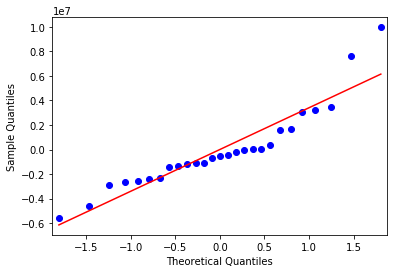

In [88]:
#Q-Q plot for normality
fig4=sm.qqplot(reg2.resid, line='r')

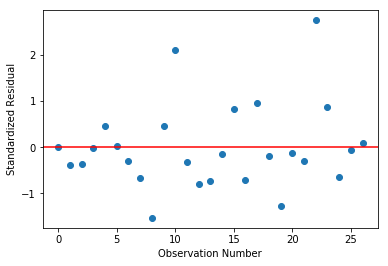

In [89]:
# simple plot of residuals
stdres=pd.DataFrame(reg2.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')


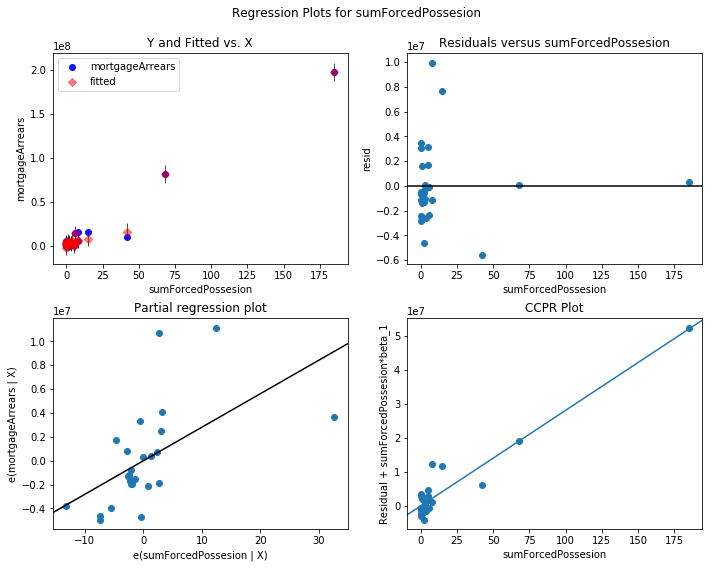

In [90]:
# additional regression diagnostic plots
fig2 = plt.figure(figsize = (10,8))
fig2 = sm.graphics.plot_regress_exog(reg2,  'sumForcedPossesion', fig=fig2)

Figure(432x288)


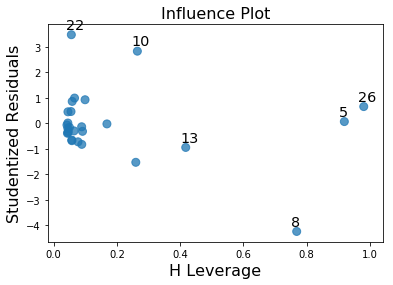

In [91]:
# leverage plot
fig3=sm.graphics.influence_plot(reg2, size=8)
print(fig3)